In [1]:
import pandas as pd
import numpy as np
import random
from random import shuffle
random.seed(18)
import re
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize
from sklearn.metrics import roc_auc_score
from nltk import word_tokenize,pos_tag
from textblob import TextBlob
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import stem
import csv
from sklearn.metrics import f1_score
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import SGDClassifier
pd.set_option('display.max_colwidth', None)



In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [3]:
# from pycorenlp import StanfordCoreNLP
# nlp = StanfordCoreNLP('http://localhost:9000')

import stanza
stanza.download('en') # download English model
nlp = stanza.Pipeline('en') # initialize English neural pipeline

2024-07-12 18:17:45 INFO: Downloaded file to /Users/gbaldonado/stanza_resources/resources.json
2024-07-12 18:17:45 INFO: Downloading default packages for language: en (English) ...
2024-07-12 18:17:47 INFO: File exists: /Users/gbaldonado/stanza_resources/en/default.zip
2024-07-12 18:17:50 INFO: Finished downloading models and saved to /Users/gbaldonado/stanza_resources
2024-07-12 18:17:50 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-12 18:17:51 INFO: Downloaded file to /Users/gbaldonado/stanza_resources/resources.json
2024-07-12 18:17:52 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-07-12 18:17:52 INFO: Using device: cpu
2024-07-12 18:17:52 INFO: Loading: tokenize
2024-07-12 18:17:52 INFO: Loading: mwt
2024-07-12 18:17:52 INFO: Loading: pos
2024-07-12 18:17:53 INFO: Loading: lemma
2024-07-12 18:17:53 INFO: Loading: constituency
2024-07-12 18:17:53 INFO: Loading: depparse
2024-07-12 18:17:53 INFO: Loading: sentiment
2024-07-12 18:17:54 INFO: Loading: 

In [109]:
merged_aspirational_df = pd.read_csv("/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/processed_for_model/merged_themes_using_jaccard_method/merged_Aspirational_sentence_level_batch_1_jaccard.csv", encoding='utf-8')
training_df, test_df = train_test_split(merged_aspirational_df, test_size=0.2, random_state=18, stratify=merged_aspirational_df['label'])
training_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [110]:
training_df

,sentence,label,phrase
0,one is obviously this class is a requirement for my general education credits and also because i thought it'd be interesting to further my education on astronomy.,0,['I am here so that I can enhance my education and earn a bachelors degree so that I can get a job that makes a good salary and that I get to do something exciting and interesting.']
1,to get a better and broader perspective of life.,1,"['I am here because I wanted a significant change in my life.', 'To get a better and broader perspective of life.']"
2,that is what i am in school for but it is not going so well.,0,['I would like to be a cardiothoracic surgeon.']
3,"i should have dropped the class, it was a very frustration experience, but i waited it out because i thought that if i studied enough, went to office hours enough, that i would pass.",0,['This semester I want to prove to myself that I am smart and capable of passing this class with an A. I want to actually learn the concepts and not come into class everyday confused and lost.']
4,i was apart of a sci course last semester and i loved how helpful the instructors were.,0,['I am here because I am dedicated to my success in my STEM based courses.']
...,...,...,...
3758,by the time i got here at sfsu i decided to just do it.,0,['I am at San Francisco State University to get a bachelors degree in Civil Engineering.']
3759,thiis is something that is shitty because i do not want to study cs. it is something my parents want me to study and i and doing so because they are paying for my classes.,0,['i want to get a degree in what i am studying']
3760,"in addition, i want to become an engineer someday and that starts with me learning basics physics concepts that are going to be applied to my career.",1,['I want to become an engineer someday and that starts with me learning basics physics concepts that are going to be applied to my career.']
3761,"ever since i was little i wanted to be a doctor, so much so that i can't see myself doing anything else.",1,"[""Ever since I was little I wanted to be a doctor, so much so that I can't see myself doing anything else.""]"


In [111]:
training_df.head()

,sentence,label,phrase
0,one is obviously this class is a requirement for my general education credits and also because i thought it'd be interesting to further my education on astronomy.,0,['I am here so that I can enhance my education and earn a bachelors degree so that I can get a job that makes a good salary and that I get to do something exciting and interesting.']
1,to get a better and broader perspective of life.,1,"['I am here because I wanted a significant change in my life.', 'To get a better and broader perspective of life.']"
2,that is what i am in school for but it is not going so well.,0,['I would like to be a cardiothoracic surgeon.']
3,"i should have dropped the class, it was a very frustration experience, but i waited it out because i thought that if i studied enough, went to office hours enough, that i would pass.",0,['This semester I want to prove to myself that I am smart and capable of passing this class with an A. I want to actually learn the concepts and not come into class everyday confused and lost.']
4,i was apart of a sci course last semester and i loved how helpful the instructors were.,0,['I am here because I am dedicated to my success in my STEM based courses.']


In [113]:
pos_labels = len([n for n in training_df['label'] if n==1])
print("Positive labels present in the dataset : {}  out of {} or {}%".format(pos_labels, len(training_df['label']), (pos_labels/len(training_df['label']))*100))

Positive labels present in the dataset : 470  out of 3763 or 12.490034546904067%


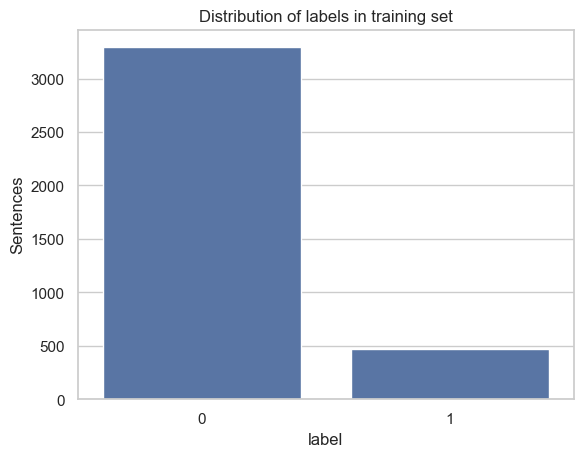

In [114]:
x = training_df['label'].value_counts()
sns.barplot(x)
sns.set(style="whitegrid")
plt.title('Distribution of labels in training set')
plt.gca().set_ylabel('Sentences')
plt.show()

In [115]:
test_df.shape

(941, 3)

In [116]:
test_df.head()

,sentence,label,phrase
0,also i want to be an optometrist and this class is part of that journey.,1,['Also I want to be an optometrist and this class is part of that journey.']
1,unfortunately it is a requirement for biology major students.,0,"[""I am here because this class is one of many classes I need to take to complete a bachelor's degree in biology.""]"
2,i am here to learn beyond my prior knowledge.,0,"[""I'm here because I need this class to graduate, but to zoom out, I'm in school to succeed. I am here to learn beyond my prior knowledge. I am here so that I am can become confident in speaking up and sharing my thoughts in an organized structure. I am here so I am knowledgeable enough to transform and create ideas and creations.""]"
3,i have no specific direction in my life other than the general goal i have always had since i knew how to talk.,0,['I want to try to get into veterinary school that is why I am in OCHEM.']
4,im here because i want to pursue a career in the medical field.,0,"['More specifically, this class will get me one step closer to my career goal']"


In [117]:
pos_labels = len([n for n in test_df['label'] if n==1])
print("Positive labels present in the test dataset : {}  out of {} or {}%".format(pos_labels, len(test_df['label']), (pos_labels/len(test_df['label']))*100))

Positive labels present in the test dataset : 118  out of 941 or 12.539851222104145%


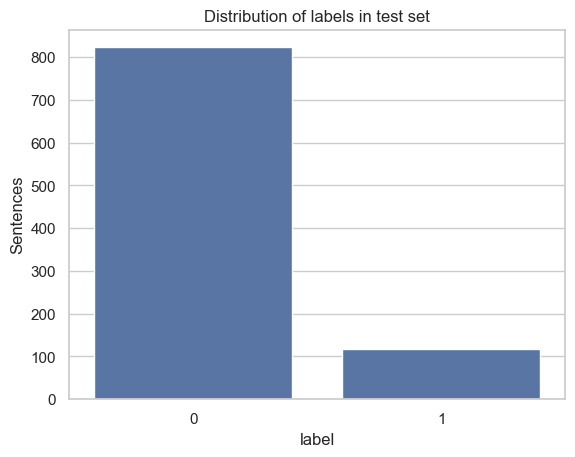

In [118]:
x1 = test_df['label'].value_counts()
sns.barplot(x1)
sns.set(style="whitegrid")
plt.title('Distribution of labels in test set')
plt.gca().set_ylabel('Sentences')
plt.show()

### FEATURE ENGINEERING

**1. NER**

In [45]:
def get_ner(text):
    ner_list = []
    # Annotate the text using stanza
    doc = nlp(text)

    for sentence in doc.sentences:
        for entity in sentence.ents:
            if entity.type == 'PERSON':
                ner_list.append(entity.text)

    return ner_list

# Example usage
text = "Barack Obama was the 44th doctor of the United States."
print(get_ner(text))

['Barack Obama']


In [46]:
# check if a named entity is present in the sentence
def named_entity_present(sentence):
    ner_list = get_ner(sentence)
    if len(ner_list) > 0:
        return 1
    else:
        return 0

**2. Similarity Features**

In [47]:
# A helper function to get the similar words and similarity score
# The function takes tokens of sentence as input and if its not a stop word, get its similarity with synsets of STEM.
stop_words = set(stopwords.words('english'))
stop_words |= set(["help","try", "work", "process", "support", "job"] )
def word_similarity(tokens, syns, field):    
    if field in ['engineering', 'technology']:
        score_threshold = 0.5
    else:
        score_threshold = 0.2
    sim_words = 0
    for token in tokens:
        if token not in stop_words:
            try:
                syns_word = wordnet.synsets(token) 
                score = syns_word[0].path_similarity(syns[0])
                if score >= score_threshold:
                    sim_words += 1
            except: 
                score = 0
    
    return sim_words

In [48]:
# Functions to create columns for similarity based on all STEM fields
syns_bio = wordnet.synsets(lemmatizer.lemmatize("biology"))
syns_maths = wordnet.synsets(lemmatizer.lemmatize("mathematics")) 
syns_tech = wordnet.synsets(lemmatizer.lemmatize("technology"))
syns_eng = wordnet.synsets(lemmatizer.lemmatize("engineering"))
syns_chem = wordnet.synsets(lemmatizer.lemmatize("chemistry"))
syns_phy = wordnet.synsets(lemmatizer.lemmatize("physics"))
syns_sci = wordnet.synsets(lemmatizer.lemmatize("science"))

**3. Medical Word Count**

In [49]:
# Load the medical specialization text file and create a list
medical_list = []
with open('/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/features/medical_specialities.txt', 'r') as medical_fields:
    for line in medical_fields.readlines():
        special_field = line.rstrip('\n')
        special_field = re.sub("\W"," ", special_field )
#         print(special_field)
        medical_list += special_field.split()
medical_list = list(set(medical_list))  
medical_list = [x.lower() for x in medical_list]
print(medical_list)

['pelvic', 'medical', 'interventional', 'advanced', 'child', 'endocrinology', 'nephrology', 'rheumatology', 'calculi', 'strabismus', 'neuromuscular', 'internal', 'disabilities', 'neuropathology', 'genetic', 'immunopathology', 'critical', 'anesthesiology', 'oculoplastics', 'emergency', 'cardiovascular', 'internal', 'behavioral', 'neck', 'transplant', 'neuroradiology', 'transplant', 'neuro', 'imaging', 'genetic', 'allergy', 'sports', 'retardation', 'sleep', 'pediatrics', 'preventive', 'musculoskeletal', 'liaison', 'anatomical', 'cardiology', 'cardiothoracic', 'radiation', 'blood', 'pain', 'disease', 'dermatopathology', 'surgery', 'nephrology', 'ophthalmology', 'segment', 'consultation', 'abuse', 'dermatology', 'endocrinology', 'gastrointestinal', 'gynecologic', 'interventional', 'perinatal', 'psychiatry', 'reproductive', 'gastroenterology', 'sports', 'microbiology', 'adolescent', 'cardiac', 'male', 'forensic', 'metabolism', 'rehabilitation', 'orbit', 'molecular', 'neurology', 'hospice', 

In [50]:
# A helper function to get medical words
def check_medical_words(tokens):
    for token in tokens:
        if token not in stop_words and token in [x.lower() for x in medical_list]:
            return 1
        
    return 0

**4. Sentiment Polarity and Subjectivity**

In [51]:
# A helper function to get polarity and subjectivity of the sentence using TexBlob
def get_sentiment(sentence):
    sentiments =TextBlob(sentence).sentiment
    polarity = sentiments.polarity
    subjectivity = sentiments.subjectivity
    return polarity, subjectivity

**5. POS Tag Count**

In [52]:
# A helper function to get the count of POS tags of the sentence
def count_pos_tags(tokens):
    token_pos = pos_tag(tokens)
    count = Counter(tag for word,tag in token_pos)
    interjections =  count['UH']
    nouns = count['NN'] + count['NNS'] + count['NNP'] + count['NNPS']
    adverb = count['RB'] + count['RBS'] + count['RBR']
    verb = count['VB'] + count['VBD'] + count['VBG'] + count['VBN']
    determiner = count['DT']
    pronoun = count['PRP']
    adjetive = count['JJ'] + count['JJR'] + count['JJS']
    preposition = count['IN']
    return interjections, nouns, adverb, verb, determiner, pronoun, adjetive,preposition

In [53]:
def pos_tag_extraction(dataframe, field, func, column_names):
    return pd.concat((
        dataframe,
        dataframe[field].apply(
            lambda cell: pd.Series(func(cell), index=column_names))), axis=1)

**6. Word Embeddings**

In [54]:
# Load the w2v dict from pickle file
with open('/Users/gbaldonado/Developer/ml-alma-taccti/ml-alma-taccti/data/features/pickle/embeddings06122024.pickle', 'rb') as w2v_file:
    w2v_dict = pickle.load(w2v_file)

In [71]:
print("length of word embeddings: ", len(w2v_dict.keys()))

length of word embeddings:  4762


In [97]:
# Get the vectors for the essay
def vectorizer(sequence):
    vect = []
    numw = 0
    for w in sequence: 
        try :
            if numw == 0:
                vect = w2v_dict[w]
            else:
                vect = np.add(vect, w2v_dict[w])
            numw += 1
        except Exception as e:
            pass

    return vect/ numw 

In [ ]:
vectorizer()

In [93]:
# Function to split text into words
def split_into_words(text):
    return text.split()

**7. Unigrams**

In [94]:
# Define the vectorizer
unigram_vect = CountVectorizer(ngram_range=(1, 1), min_df=2, stop_words = 'english')

**WRAPPER**

In [123]:
# Wrapper function for feature engineering
def feature_engineering(original_dataset):

    dataset = original_dataset.copy()
    # create a new column with sentence tokens
    dataset['tokens'] = dataset['sentence'].apply(word_tokenize)
    # 1. Similarity features
    # biology
    dataset['bio_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_bio,'biology',)) 
    # chemistry
    dataset['chem_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_chem,'chemistry',))
    # physics
    dataset['phy_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_phy,'physics',))
    # mathematics
    dataset['math_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_maths,'mathematics',))
    # technology
    dataset['tech_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_tech,'technology',))
    # engineering
    dataset['eng_sim_words'] = dataset['tokens'].apply(word_similarity, args=(syns_eng,'engineering',))
    
    # medical terms
    dataset['medical_terms'] = dataset['tokens'].apply(check_medical_words)
    
    # polarity and subjectivity
    dataset['polarity'], dataset['subjectivity'] = zip(*dataset['sentence'].apply(get_sentiment))
    
    # named entity recognition
    dataset['ner'] = dataset['sentence'].apply(named_entity_present)
    
    # pos tag count
    dataset = pos_tag_extraction(dataset, 'tokens', count_pos_tags, ['interjections', 'nouns', 'adverb', 'verb', 'determiner', 'pronoun', 'adjetive','preposition'])
    
    # labels
    data_labels = dataset['label']
    # X
    data_x = dataset.drop(columns='label')

    
    # vectorize all the essays
    vect_arr = data_x.tokens.apply(vectorizer)
    for index in range(0, len(vect_arr)):
        i = 0
        for item in vect_arr[index]:
            column_name= "embedding" + str(i)
            data_x.loc[index, column_name] = item
            i +=1
    
    return data_x,data_labels
    

In [128]:
X_train, y_train = feature_engineering(training_df)

In [ ]:
X_train.

In [125]:
X_train.shape

(20, 121)

In [126]:
X_train

,sentence,phrase,tokens,bio_sim_words,chem_sim_words,phy_sim_words,math_sim_words,tech_sim_words,eng_sim_words,medical_terms,...,embedding90,embedding91,embedding92,embedding93,embedding94,embedding95,embedding96,embedding97,embedding98,embedding99
0,one is obviously this class is a requirement for my general education credits and also because i thought it'd be interesting to further my education on astronomy.,['I am here so that I can enhance my education and earn a bachelors degree so that I can get a job that makes a good salary and that I get to do something exciting and interesting.'],"[one, is, obviously, this, class, is, a, requirement, for, my, general, education, credits, and, also, because, i, thought, it, 'd, be, interesting, to, further, my, education, on, astronomy, .]",1,1,0,1,0,0,0,...,0.487845,0.183000,-0.029280,0.080841,0.227600,-0.069685,0.336133,-0.074894,-0.010053,0.114453
1,to get a better and broader perspective of life.,"['I am here because I wanted a significant change in my life.', 'To get a better and broader perspective of life.']","[to, get, a, better, and, broader, perspective, of, life, .]",0,0,0,0,0,0,0,...,0.344721,0.162200,0.014252,-0.021162,0.154372,-0.072484,0.340524,-0.152142,-0.024123,0.113133
2,that is what i am in school for but it is not going so well.,['I would like to be a cardiothoracic surgeon.'],"[that, is, what, i, am, in, school, for, but, it, is, not, going, so, well, .]",0,0,0,0,0,0,0,...,0.488623,0.204053,-0.097133,0.085072,0.215851,-0.046570,0.238907,-0.034365,0.008272,0.054369
3,"i should have dropped the class, it was a very frustration experience, but i waited it out because i thought that if i studied enough, went to office hours enough, that i would pass.",['This semester I want to prove to myself that I am smart and capable of passing this class with an A. I want to actually learn the concepts and not come into class everyday confused and lost.'],"[i, should, have, dropped, the, class, ,, it, was, a, very, frustration, experience, ,, but, i, waited, it, out, because, i, thought, that, if, i, studied, enough, ,, went, to, office, hours, enough, ,, that, i, would, pass, .]",0,0,0,0,0,0,0,...,0.434654,0.203142,-0.040918,0.069848,0.238936,-0.023290,0.183520,-0.074296,-0.001161,0.090196
4,i was apart of a sci course last semester and i loved how helpful the instructors were.,['I am here because I am dedicated to my success in my STEM based courses.'],"[i, was, apart, of, a, sci, course, last, semester, and, i, loved, how, helpful, the, instructors, were, .]",0,0,0,0,0,0,0,...,0.447531,0.231019,-0.051642,0.052862,0.309309,0.016724,0.275399,-0.121663,0.026029,0.079961
5,"firstly, i am here to challenge myself and make myself known in the stem field.","['Firstly, I am here to challenge myself and make myself known in the STEM field.', 'Lastly, I am here because I am passionate about my education and I never want to stop learning.']","[firstly, ,, i, am, here, to, challenge, myself, and, make, myself, known, in, the, stem, field, .]",0,0,0,0,0,0,0,...,0.387175,0.225236,0.021366,-0.000490,0.140667,-0.079013,0.284686,-0.135737,-0.059571,0.147064
6,"though i love to write fiction, the fact that it is not the most stable option does not elude me.","['I am here to create. With an education in computer science and a long cultivated skill in narrative capability, I am in a better position to create than ever before. Its another tool in my belt, and a pillar of stability. I want to create phenomena of all sorts that provoke thought and challenge the very way people perceive the world around them.', 'I would love to be among those who challenge people to think truly on their own.']","[though, i, love, to, write, fiction, ,, the, fact, that, it, is, not, the, most, stable, option, does, not, elude, me, .]",0,0,0,0,0,0,0,...,0.410373,0.158538,-0.072777,0.063357,0.282437,-0.041377,0.245481,-0.081472,-0.004222,0.022449
7,i have a drive to do better in a world that constantly belittles my comm

In [129]:
y_train = y_train.astype('int')

In [130]:
X_test, y_test = feature_engineering(test_df)

KeyboardInterrupt: 

In [131]:
X_test.shape

(941, 121)

In [132]:
y_test = y_test.astype('int')

**Calculate Unigram features for both train and test set**

In [133]:
# Unigrams for training set
unigram_matrix = unigram_vect.fit_transform(X_train['sentence'])
unigrams = pd.DataFrame(unigram_matrix.toarray())
print("Shape of the unigram df for train : ",unigrams.shape)
unigrams = unigrams.reset_index()
unigrams = unigrams.iloc[:,1:]

Shape of the unigram df for train :  (3763, 2134)


In [134]:
X_train_final = pd.concat([X_train, unigrams], axis = 1)

In [204]:
X_train_final.shape
X_train_final.to_csv("X_train_final.csv", index=False)
X_test_final.to_csv("X_test_final.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [146]:
X_train_final.columns = X_train_final.columns.astype(str)

In [136]:
unigram_matrix_test = unigram_vect.transform(X_test['sentence'])
unigrams_test = pd.DataFrame(unigram_matrix_test.toarray())
unigrams_test = unigrams_test.reset_index()
unigrams_test = unigrams_test.iloc[:,1:]
print("Test unigram df shape : ",unigrams_test.shape)

Test unigram df shape :  (941, 2134)


In [137]:
X_test_final = pd.concat([X_test, unigrams_test], axis = 1)

In [147]:
X_test_final.columns = X_test_final.columns.astype(str)

In [148]:
X_test_final.shape

(941, 2255)

In [149]:
for i in range(0, len(X_train_final.columns)):
    print('{} ---- {}'.format(i, X_train_final.columns[i]))

0 ---- sentence
1 ---- phrase
2 ---- tokens
3 ---- bio_sim_words
4 ---- chem_sim_words
5 ---- phy_sim_words
6 ---- math_sim_words
7 ---- tech_sim_words
8 ---- eng_sim_words
9 ---- medical_terms
10 ---- polarity
11 ---- subjectivity
12 ---- ner
13 ---- interjections
14 ---- nouns
15 ---- adverb
16 ---- verb
17 ---- determiner
18 ---- pronoun
19 ---- adjetive
20 ---- preposition
21 ---- embedding0
22 ---- embedding1
23 ---- embedding2
24 ---- embedding3
25 ---- embedding4
26 ---- embedding5
27 ---- embedding6
28 ---- embedding7
29 ---- embedding8
30 ---- embedding9
31 ---- embedding10
32 ---- embedding11
33 ---- embedding12
34 ---- embedding13
35 ---- embedding14
36 ---- embedding15
37 ---- embedding16
38 ---- embedding17
39 ---- embedding18
40 ---- embedding19
41 ---- embedding20
42 ---- embedding21
43 ---- embedding22
44 ---- embedding23
45 ---- embedding24
46 ---- embedding25
47 ---- embedding26
48 ---- embedding27
49 ---- embedding28
50 ---- embedding29
51 ---- embedding30
52 ---- em

### Model 1: Unigrams, POS Tag Count, Sentiment Polarity, Subjectivity

In [151]:
X_train_model_1 = X_train_final.iloc[:,np.r_[10:12,13:21,121:1113]]

In [152]:
X_train_model_1.shape

(3763, 1002)

In [153]:
X_train_model_1.head(2)

,polarity,subjectivity,interjections,nouns,adverb,verb,determiner,pronoun,adjetive,preposition,...,982,983,984,985,986,987,988,989,990,991
0,0.1375,0.5,0,7,2,4,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0
1,0.5000,0.5,0,2,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_test_model_1 = X_test_final.iloc[:,np.r_[10:12,13:21,121:1113]]

In [155]:
X_test_model_1.shape

(941, 1002)

In [156]:
model_1_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_1_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_1,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_1), digits=4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.385
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9274    0.7606    0.8358       823
           1     0.2594    0.5847    0.3594       118

    accuracy                         0.7386       941
   macro avg     0.5934    0.6727    0.5976       941
weighted avg     0.8436    0.7386    0.7760       941



In [157]:
lr_model_1 = LogisticRegression(random_state=18, 
                                solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], 
                                class_weight='balanced').fit(X_train_model_1, y_train)
y_lr = lr_model_1.predict(X_test_model_1)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 626, False Positive: 197, False Negative: 49, True Positive: 69
--------------------------------------------------------------------------------
[[626 197]
 [ 49  69]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       823
           1       0.26      0.58      0.36       118

    accuracy                           0.74       941
   macro avg       0.59      0.67      0.60       941
weighted avg       0.84      0.74      0.78       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.93 | 0.85 | 0.89 | 117 |
| Class 1 |0.51 | 0.72 | 0.60 | 25 |
| Macro Average Score | 0.72 | 0.79 | 0.75 | 142|

### Model 2: All Features

In [158]:
X_train_model_2 = X_train_final.iloc[:,np.r_[3:1113]]

In [159]:
X_train_model_2.shape

(3763, 1110)

In [160]:
X_test_model_2 = X_test_final.iloc[:,np.r_[3:1113]]

In [161]:
X_test_model_2.shape

(941, 1110)

In [162]:
model_2_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_2_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_2,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_2), digits=4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.418
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9377    0.7315    0.8218       823
           1     0.2609    0.6610    0.3741       118

    accuracy                         0.7226       941
   macro avg     0.5993    0.6962    0.5980       941
weighted avg     0.8528    0.7226    0.7657       941



In [165]:
lr_model_2 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_2, y_train)
y_lr = lr_model_2.predict(X_test_model_2)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 602, False Positive: 221, False Negative: 40, True Positive: 78
--------------------------------------------------------------------------------
[[602 221]
 [ 40  78]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       823
           1       0.26      0.66      0.37       118

    accuracy                           0.72       941
   macro avg       0.60      0.70      0.60       941
weighted avg       0.85      0.72      0.77       941



In [166]:
NameOfVariables = X_train_model_2.columns.values
Var_coef = zip(lr_model_2.coef_[0,:],NameOfVariables)
sorted_coef_val = sorted(Var_coef)
for item in sorted_coef_val:
    print(item[1],'--- Value:',item[0])

embedding87 --- Value: -0.9479933063617542
220 --- Value: -0.6743455123271457
941 --- Value: -0.6310531457644357
embedding83 --- Value: -0.6296186073342195
536 --- Value: -0.6239875705388835
embedding94 --- Value: -0.6225832018200506
742 --- Value: -0.6000490991544583
embedding0 --- Value: -0.5044714418808884
373 --- Value: -0.49319366030039435
925 --- Value: -0.4723239460194282
embedding61 --- Value: -0.46769548037563663
758 --- Value: -0.466905977196651
371 --- Value: -0.4640438426685858
940 --- Value: -0.4613502722642347
embedding9 --- Value: -0.4542733907569744
embedding85 --- Value: -0.44837356367803766
345 --- Value: -0.44619449054606103
embedding88 --- Value: -0.4319095619640387
915 --- Value: -0.3936171881940246
646 --- Value: -0.3688521695899657
823 --- Value: -0.3683499967536823
embedding44 --- Value: -0.3662050922540079
embedding79 --- Value: -0.3613705539872949
embedding90 --- Value: -0.3429500473121967
subjectivity --- Value: -0.33959222316461485
461 --- Value: -0.33733369

| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.97 | 0.88 | 0.92 | 117 |
| Class 1 |0.61 | 0.88 | 0.72 | 25 |
| Macro Average Score | 0.79 | 0.88 | 0.82 | 142|

### Model 3: Without Unigrams

In [167]:
X_train_model_3 = X_train_final.iloc[:,np.r_[3:121]]

In [168]:
X_train_model_3.shape

(3763, 118)

In [169]:
X_test_model_3 = X_test_final.iloc[:,np.r_[3:121]]

In [170]:
X_test_model_3.shape

(941, 118)

In [171]:
model_3_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_3_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_3,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_3), digits=4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.388
Best parameters set:
	clf__C: 25
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9521    0.6768    0.7912       823
           1     0.2528    0.7627    0.3797       118

    accuracy                         0.6876       941
   macro avg     0.6025    0.7198    0.5855       941
weighted avg     0.8644    0.6876    0.7396       941



In [172]:
lr_model_3 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_3, y_train)
y_lr = lr_model_3.predict(X_test_model_3)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 557, False Positive: 266, False Negative: 28, True Positive: 90
--------------------------------------------------------------------------------
[[557 266]
 [ 28  90]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       823
           1       0.25      0.76      0.38       118

    accuracy                           0.69       941
   macro avg       0.60      0.72      0.59       941
weighted avg       0.86      0.69      0.74       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.99 | 0.82 | 0.90 | 117 |
| Class 1 |0.53 | 0.96 | 0.69 | 25 |
| Macro Average Score | 0.76 | 0.89 | 0.79 | 142|

### Model 4: Without Embeddings

In [173]:
X_train_model_4 = X_train_final.iloc[:,np.r_[3:21,121:1113]]

In [174]:
X_train_model_4.shape

(3763, 1010)

In [175]:
X_test_model_4 = X_test_final.iloc[:,np.r_[3:21,121:1113]]

In [176]:
X_test_model_4.shape

(941, 1010)

In [177]:
model_4_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_4_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_4,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_4), digits=4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.390
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0     0.9270    0.7558    0.8327       823
           1     0.2556    0.5847    0.3557       118

    accuracy                         0.7343       941
   macro avg     0.5913    0.6703    0.5942       941
weighted avg     0.8428    0.7343    0.7728       941



In [178]:
lr_model_4 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_4, y_train)
y_lr = lr_model_4.predict(X_test_model_4)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 622, False Positive: 201, False Negative: 49, True Positive: 69
--------------------------------------------------------------------------------
[[622 201]
 [ 49  69]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       823
           1       0.26      0.58      0.36       118

    accuracy                           0.73       941
   macro avg       0.59      0.67      0.59       941
weighted avg       0.84      0.73      0.77       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.94 | 0.89 | 0.91 | 117 |
| Class 1 |0.58 | 0.72 | 0.64 | 25 |
| Macro Average Score | 0.76 | 0.80 | 0.78 | 142|

### Model 5: Without POS Tag Count

In [179]:
X_train_model_5 = X_train_final.iloc[:,np.r_[3:13,21:1113]]

In [180]:
X_train_model_5.shape

(3763, 1102)

In [181]:
X_test_model_5 = X_test_final.iloc[:,np.r_[3:13,21:1113]]

In [182]:
X_test_model_5.shape

(941, 1102)

In [183]:
model_5_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_5_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_5,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_5), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.402
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       823
           1       0.29      0.73      0.41       118

    accuracy                           0.74       941
   macro avg       0.62      0.73      0.62       941
weighted avg       0.87      0.74      0.78       941



In [184]:
lr_model_5 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_5, y_train)
y_lr = lr_model_5.predict(X_test_model_5)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 608, False Positive: 215, False Negative: 32, True Positive: 86
--------------------------------------------------------------------------------
[[608 215]
 [ 32  86]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       823
           1       0.29      0.73      0.41       118

    accuracy                           0.74       941
   macro avg       0.62      0.73      0.62       941
weighted avg       0.87      0.74      0.78       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.96 | 0.86 | 0.91 | 117 |
| Class 1 |0.57 | 0.84 | 0.68 | 25 |
| Macro Average Score | 0.76 | 0.85 | 0.79 | 142|

In [185]:
NameOfVariables = X_train_model_5.columns.values
Var_coef = zip(lr_model_5.coef_[0,:],NameOfVariables)
sorted_coef_val = sorted(Var_coef)
for item in sorted_coef_val:
    print(item[1],'--- Value:',item[0])

embedding87 --- Value: -0.8182971709303518
embedding94 --- Value: -0.6286071870410861
embedding83 --- Value: -0.6203036533307168
220 --- Value: -0.5839417332981749
742 --- Value: -0.5790220769537034
536 --- Value: -0.5299428086786621
embedding0 --- Value: -0.5245878286796771
embedding9 --- Value: -0.5221138408228698
941 --- Value: -0.5035552874939756
940 --- Value: -0.4956391496166636
embedding85 --- Value: -0.4760989103672994
373 --- Value: -0.46180211779019253
758 --- Value: -0.43352217387564745
345 --- Value: -0.42914489840674896
embedding61 --- Value: -0.42403341467880185
925 --- Value: -0.40066946264742426
embedding43 --- Value: -0.3870855520864859
646 --- Value: -0.3731299678693096
823 --- Value: -0.3638545148457173
embedding42 --- Value: -0.36256803608671273
embedding88 --- Value: -0.3549277599261198
embedding90 --- Value: -0.3526643887810724
371 --- Value: -0.34804648082533857
embedding44 --- Value: -0.3361042405316454
embedding74 --- Value: -0.3336721360747008
embedding93 --- 

### Model 6: Without STEM Similarity

In [186]:
X_train_model_6 = X_train_final.iloc[:,np.r_[10:1113]]

In [187]:
X_train_model_6.shape

(3763, 1103)

In [188]:
X_test_model_6 = X_test_final.iloc[:,np.r_[10:1113]]

In [189]:
X_test_model_6.shape

(941, 1103)

In [190]:
model_6_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_6_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_6,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_6), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.410
Best parameters set:
	clf__C: 1
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       823
           1       0.27      0.62      0.38       118

    accuracy                           0.75       941
   macro avg       0.60      0.69      0.61       941
weighted avg       0.85      0.75      0.78       941



In [191]:
lr_model_6 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_6, y_train)
y_lr = lr_model_6.predict(X_test_model_6)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 630, False Positive: 193, False Negative: 45, True Positive: 73
--------------------------------------------------------------------------------
[[630 193]
 [ 45  73]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       823
           1       0.27      0.62      0.38       118

    accuracy                           0.75       941
   macro avg       0.60      0.69      0.61       941
weighted avg       0.85      0.75      0.78       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.97 | 0.87 | 0.92 | 117 |
| Class 1 |0.59 | 0.88 | 0.71 | 25 |
| Macro Average Score | 0.78 | 0.88 | 0.81 | 142|

### Model 7: Without Sentiment Features

In [192]:
X_train_model_7 = X_train_final.iloc[:,np.r_[3:10,12:1113]]

In [193]:
X_train_model_7.shape

(3763, 1108)

In [194]:
X_test_model_7 = X_test_final.iloc[:,np.r_[3:10,12:1113]]

In [195]:
X_test_model_7.shape

(941, 1108)

In [196]:
model_7_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_7_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_7,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_7), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.410
Best parameters set:
	clf__C: 1
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       823
           1       0.26      0.60      0.37       118

    accuracy                           0.74       941
   macro avg       0.60      0.68      0.60       941
weighted avg       0.85      0.74      0.78       941



In [197]:
lr_model_7 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_7, y_train)
y_lr = lr_model_7.predict(X_test_model_7)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 624, False Positive: 199, False Negative: 47, True Positive: 71
--------------------------------------------------------------------------------
[[624 199]
 [ 47  71]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       823
           1       0.26      0.60      0.37       118

    accuracy                           0.74       941
   macro avg       0.60      0.68      0.60       941
weighted avg       0.85      0.74      0.78       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.94 | 0.88 | 0.91 | 117 |
| Class 1 |0.58 | 0.76 | 0.66 | 25 |
| Macro Average Score | 0.76 | 0.82 | 0.78 | 142|

### Model 8: Without NER

In [198]:
X_train_model_8 = X_train_final.iloc[:,np.r_[3:12,13:1113]]

In [199]:
X_train_model_8.shape

(3763, 1109)

In [200]:
X_test_model_8 = X_test_final.iloc[:,np.r_[3:12,13:1113]]

In [201]:
X_test_model_8.shape

(941, 1109)

In [202]:
model_8_pipeline = Pipeline([ 
                        ('clf', LogisticRegression(class_weight='balanced',random_state=18)),
                       ])

parameters = {
               'clf__C': [0.001,.009,0.01,.09,1,5,10,25],
               'clf__penalty' : ["l2"],
               'clf__solver': ['liblinear']
             }

grid_search = GridSearchCV(model_8_pipeline, parameters, scoring="f1", cv = 10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_model_8,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    

print(classification_report(y_test, grid_search.best_estimator_.predict(X_test_model_8), digits=2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.418
Best parameters set:
	clf__C: 0.09
	clf__penalty: 'l2'
	clf__solver: 'liblinear'
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       823
           1       0.26      0.66      0.37       118

    accuracy                           0.72       941
   macro avg       0.60      0.70      0.60       941
weighted avg       0.85      0.72      0.77       941



In [203]:
lr_model_8 = LogisticRegression(random_state=18, solver=best_parameters['clf__solver'], 
                                C=best_parameters['clf__C'], 
                                penalty=best_parameters['clf__penalty'], class_weight='balanced').fit(X_train_model_8, y_train)
y_lr = lr_model_8.predict(X_test_model_8)
print('Logistic regression Classifier')
tn, fp, fn, tp = confusion_matrix(y_test, y_lr).ravel()
print('True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}'.format(tn, fp, fn, tp))
print('-' * 80)
print(confusion_matrix(y_test, y_lr))
print('-' * 80)
print(classification_report(y_test, y_lr))

Logistic regression Classifier
True Negative: 602, False Positive: 221, False Negative: 40, True Positive: 78
--------------------------------------------------------------------------------
[[602 221]
 [ 40  78]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       823
           1       0.26      0.66      0.37       118

    accuracy                           0.72       941
   macro avg       0.60      0.70      0.60       941
weighted avg       0.85      0.72      0.77       941



| | Precision | Recall | F1 | Data Points |
| --- | --- |--- | --- | --- |
| Class 0 | 0.96 | 0.86 | 0.91 | 117 |
| Class 1 |0.57 | 0.84 | 0.68 | 25 |
| Macro Average Score | 0.76 | 0.85 | 0.79 | 142|

### Final Summary

| S.No|Features| Precision | Recall | F1 |
| :-:| :-- | :-: |:-: | :-: |
| 1 |Embeddings + POS Tag Count + Sentiment (Polarity and Subjectivity) + STEM Similarity + NER| 0.76 | 0.89 | 0.79 |
| 2 |Unigrams + POS Tag Count + Sentiment (Polarity and Subjectivity) + STEM Similarity + NER  |0.76 | 0.80 | 0.78 |
| 3 |Embeddings + Unigrams + Sentiment (Polarity and Subjectivity) + STEM Similarity + NER | 0.76 | 0.85 | 0.79 |
| 4 |**Embeddings + Unigrams + Sentiment (Polarity and Subjectivity) + NER + POS Tag Count** | **0.78** | **0.88** | **0.81**|
| 5 |Embeddings + Unigrams + STEM Similarity + NER + POS Tag Count | 0.76 | 0.82 | 0.78|
| 6 |Embeddings + Unigrams + STEM Similarity + POS Tag Count + Sentiment (Polarity and Subjectivity) | 0.76 | 0.85 | 0.79|